In [1]:
import numpy as np
import xarray as xr
import cftime
import importlib
import matplotlib.pyplot as plt

In [2]:
from osprey.actions.postreader import postreader_nemo, averaging, writer_averaged
from osprey.actions.reader import reader_nemo_field
from osprey.means.means import spacemean, timemean, cost, apply_cost_function

2024-11-21 14:25:34,141 - INFO - Data available in the range 1990-2010.


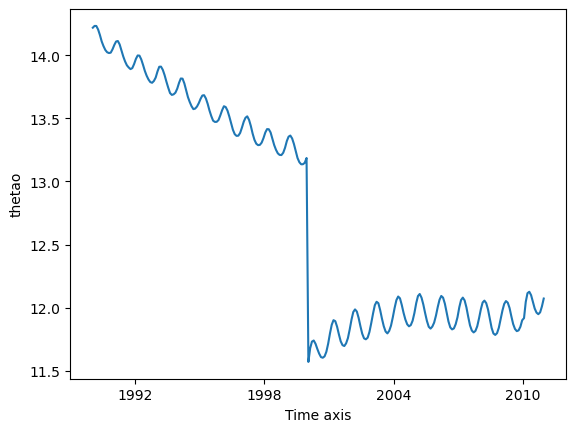

In [3]:
data = reader_nemo_field(expname='FE04', startyear=1990, endyear=2010, varname='thetao')
data.mean(dim=['x','y','z']).plot()

In [ ]:
data = reader_nemo_field(expname='FE06', startyear=1990, endyear=2009, varname='thetao')
ds = averaging(data=data, varlabel='thetao', diagname='timeseries', format='plain', use_cft=False, orca='ORCA2')
ds['thetao'].plot()

In [5]:
ds = averaging(data=data, varlabel='thetao', diagname='timeseries', format='plain', use_cft=True, orca='ORCA2')

In [3]:
data = postreader_nemo(expname='lfr0', startyear=2020, endyear=2030, varlabel='thetao', diagname='timeseries', use_cft=False, replace=True, metric='base')

2024-11-21 11:16:43,056 - INFO - Averaged data not found or replace is True. Creating new file ...
2024-11-21 11:16:43,168 - INFO - Data available in the range 2020-2030.
2024-11-21 11:16:56,438 - INFO - File to be saved at /ec/res4/scratch/itas/ece4/lfr0/post/thetao_lfr0_2020-2030_series_p_dyt.nc


In [7]:
data['thetao'].dims[0]

'time'

In [4]:
refinfo = {'expname': 'lgr3', 'startyear': 2340, 'endyear': 2349, 'diagname': 'timeseries', 'format': 'global'}
data = postreader_nemo(expname='lfr0', startyear=1990, endyear=2010, varlabel='thetao', diagname='timeseries', replace=True, metric='diff', refinfo=refinfo)

2024-11-11 18:22:42,574 - INFO - Averaged data not found. Creating new file ...
2024-11-11 18:22:42,576 - INFO - Data available in the range 1990-2010.
2024-11-11 18:22:43,497 - INFO - File to be saved at /ec/res4/scratch/itas/ece4/lfr0/post/thetao_lfr0_1990-2010_series_p.nc
2024-11-11 18:22:44,292 - INFO - Averaged reference data not found or replace is True. Creating new file ...
2024-11-11 18:22:44,293 - INFO - Data available in the range 2340-2349.
2024-11-11 18:22:44,900 - INFO - File to be saved at /ec/res4/scratch/itas/ece4/lgr3/post/thetao_lgr3_2340-2349_series_g.nc
2024-11-11 18:22:45,779 - INFO - File to be saved at /ec/res4/scratch/itas/ece4/lfr0/post/thetao_lfr0_1990-2010_series_p_D_lgr3_2340-2349_series_g.nc
2024-11-11 18:22:46,999 - INFO - File to be loaded /ec/res4/scratch/itas/ece4/lfr0/post/thetao_lfr0_1990-2010_series_p_D_lgr3_2340-2349_series_g.nc


In [9]:
refinfo = {'expname': 'lgr3', 'startyear': 2340, 'endyear': 2349, 'diagname': 'timeseries', 'format': 'monthly'}
data = postreader_nemo(expname='lfr0', startyear=1990, endyear=2010, varlabel='thetao', diagname='timeseries', replace=True, metric='diff', refinfo=refinfo)

2024-11-12 21:44:09,832 - INFO - Averaged data not found or replace is True. Creating new file ...
2024-11-12 21:44:10,799 - INFO - Data available in the range 1990-2010.
2024-11-12 21:44:13,705 - INFO - File to be saved at /ec/res4/scratch/itas/ece4/lfr0/post/thetao_lfr0_1990-2010_series_p.nc


ValueError: failed to prevent overwriting existing key units in attrs on variable 'time'. This is probably an encoding field used by xarray to describe how a variable is serialized. To proceed, remove this key from the variable's attributes manually.